In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("GlobalTemperatures.csv")

In [4]:
df.columns

Index(['dt', 'LandAverageTemperature', 'LandAverageTemperatureUncertainty',
       'LandMaxTemperature', 'LandMaxTemperatureUncertainty',
       'LandMinTemperature', 'LandMinTemperatureUncertainty',
       'LandAndOceanAverageTemperature',
       'LandAndOceanAverageTemperatureUncertainty'],
      dtype='object')

In [5]:
df["dt"] = pd.to_datetime(df["dt"])
df["Year"] = df["dt"].dt.year
df["Month"] = df["dt"].dt.month

##  Yıllara Göre Ortalama Sıcaklık Trendini Çiz

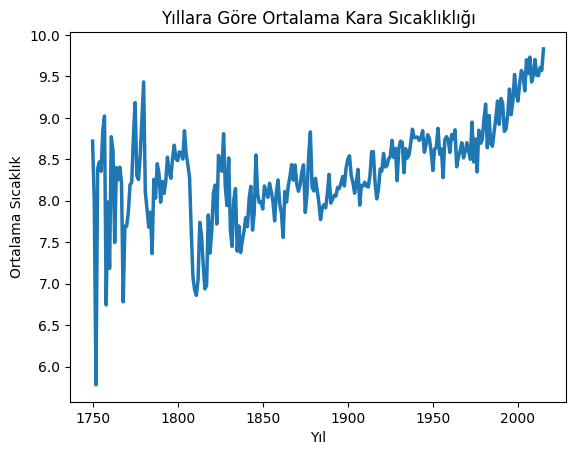

In [8]:
yearly_avg = df.groupby("Year")['LandAverageTemperature'].mean().reset_index()
sns.lineplot(data=yearly_avg , x='Year' , y='LandAverageTemperature' ,
             linewidth=2.5)

plt.title('Yıllara Göre Ortalama Kara Sıcaklıklığı')
plt.xlabel('Yıl')
plt.ylabel('Ortalama Sıcaklık')
plt.show()

##  Land ve Ocean Ortalama Sıcaklıkları Kıyasla (hue parametresi ile)

In [9]:
avg_temp = df.groupby('Year')[["LandAverageTemperature", "LandAndOceanAverageTemperature"]].mean().reset_index()
malted = avg_temp.melt(id_vars='Year' , value_vars=["LandAverageTemperature", "LandAndOceanAverageTemperature"], var_name='Type' , value_name='Temperature')


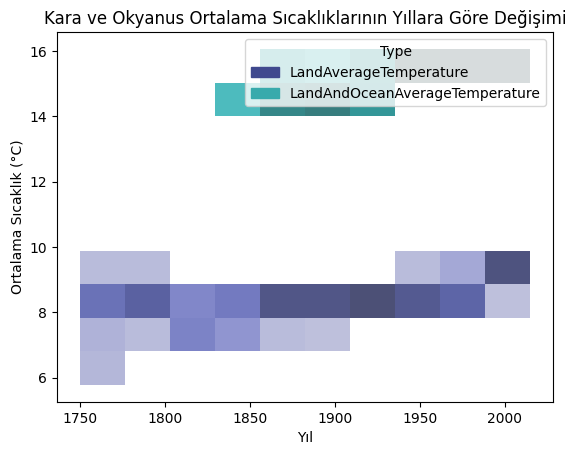

In [11]:
sns.histplot(data=malted , x='Year' , y='Temperature' 
                    ,hue='Type' , palette='mako' , linewidth=2.5)
plt.title("Kara ve Okyanus Ortalama Sıcaklıklarının Yıllara Göre Değişimi")
plt.xlabel("Yıl")
plt.ylabel("Ortalama Sıcaklık (°C)")
plt.show()

## Güven aralığı (ci parametresi) ile aylık ortalama sıcaklık

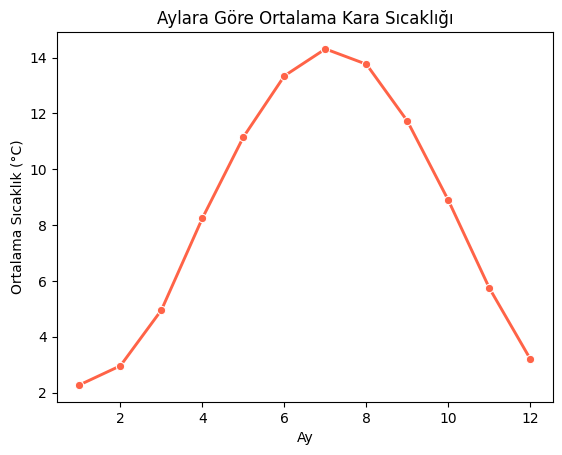

In [19]:
monthly_avg = df.groupby('Month')['LandAverageTemperature'].mean().reset_index()
sns.lineplot(data=monthly_avg , x='Month' , y='LandAverageTemperature',
                errorbar=('ci', 95) ,   marker="o" , linewidth=2.1 , color='tomato')
plt.title("Aylara Göre Ortalama Kara Sıcaklığı")
plt.xlabel("Ay")
plt.ylabel("Ortalama Sıcaklık (°C)")
plt.show()

## Son 50 Yılın Detaylı Trendini gösteren tabloyu çiz.

In [20]:
recent = df[df['Year'] >= (df['Year'].max() - 50)]
yearly_recent = recent.groupby("Year")['LandAverageTemperature'].mean().reset_index()

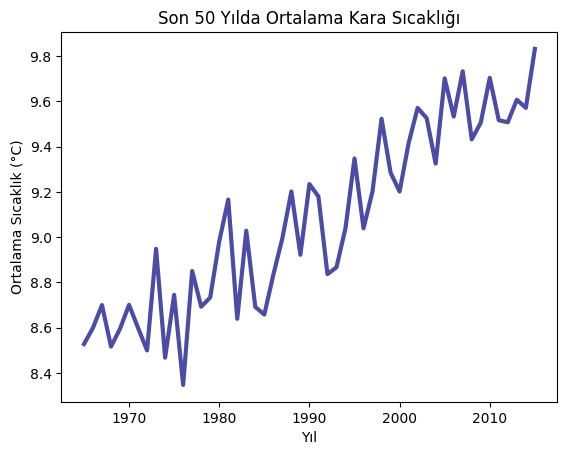

In [22]:
sns.lineplot(data=yearly_recent , x='Year' , y='LandAverageTemperature',
                    linewidth=3 , color="navy" , alpha=0.7)
plt.title("Son 50 Yılda Ortalama Kara Sıcaklığı")
plt.xlabel("Yıl")
plt.ylabel("Ortalama Sıcaklık (°C)")
plt.show()

## Aylık Trendde Tüm Yıllar

In [23]:
df['YearStr'] = df['Year'].astype(str)
monthly_year = df.groupby(['YearStr' , 'Month'])["LandAverageTemperature"].mean().reset_index()

<Axes: xlabel='Month', ylabel='LandAverageTemperature'>

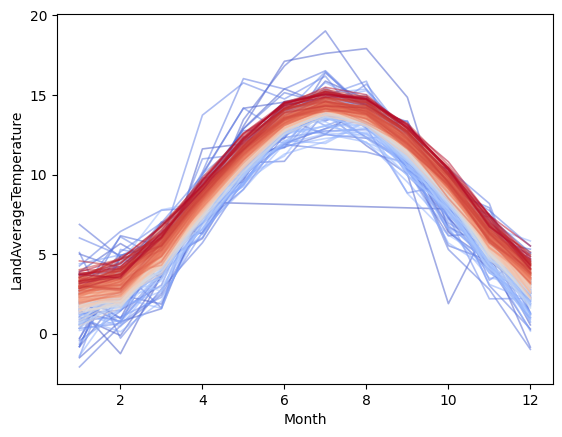

In [27]:
sns.lineplot(data=monthly_year , x='Month' , y="LandAverageTemperature",
                hue='YearStr' , palette='coolwarm' , legend=False ,
                linewidth=1.2 , alpha=0.5)